In [1]:
!pip install yfinance
import yfinance as yf

from math import log,e
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import clear_output
clear_output()

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

In [3]:
def black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.
  
  Parameters
  ----------
  stock_price: Spot market value of the underlying asset
  strike_price: Strike price of the options contract
  rate: Risk free rate
  time: Time to expiration for the options contract
  volatility: Volatility of the asset
  dividend: Dividend or yield of the asset, with a default value set to zero

  Returns
  -------
  [call,put]: Returns a list containing the estimated call and put value of the option contract
  '''

  d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
  d2 = d1 - volatility * time**.5

  call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-rate*time)
  put = stats.norm.cdf(-d2)*strike_price*e**(-rate * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)

  return [call, put]

# **Protective Put**

**A protective put strategy is executed by purchasing a put option on an underlying asset that is held in the portfolio. The loss is minimized to the strike price of the put subtracted by the cost of purchasing the put.**

**If the underlying asset rises above the strike price of the put, it expires worthless at expiration.**

## **Scenario: You are a portfolio manager and hold 100 shares of Apple (Ticker: AAPL). You forecast that the price will fall significantly. You want to protect your portfolio. To do this you will create a simulation for a protective put strategy.**

In [4]:
aapl = yf.Ticker('AAPL')
aapl_price = aapl.get_info()['previousClose']
sk_price = 170
rf_rate = yf.Ticker('^TNX').get_info()['previousClose']*.01
ivol = 0.30
t = 0.5
div_yield = aapl.get_info()['dividendYield']

print(f'Apple Stock Previously Closed at: {aapl_price}')

Apple Stock Previously Closed at: 172


In [5]:
put = black_scholes_merton(stock_price=aapl_price,
                     strike_price=sk_price,
                     rate=rf_rate, 
                     time=t, 
                     volatility=ivol, 
                     dividend=div_yield)[1]

print(f'The BSM estimate for a 6 month AAPL call option is: ${100*put:.2f}')

The BSM estimate for a 6 month AAPL call option is: $1290.00


In [6]:
aapl_portfolio = aapl_price * 100
print(f'The current value of AAPL holdings is: ${aapl_portfolio}')

The current value of AAPL holdings is: $17200


In [7]:
print(f'Purchasing a put with a strike price of {sk_price}, the portfolio is protected up to ${(sk_price-put)*100:.2f}')

Purchasing a put with a strike price of 170, the portfolio is protected up to $15710.00


In [8]:
stock_price = np.arange(125,225,.1)
protect_put = [(stock-put)*100 if (stock-put)*100 > (sk_price-put)*100 else (sk_price-put)*100 for stock in stock_price]

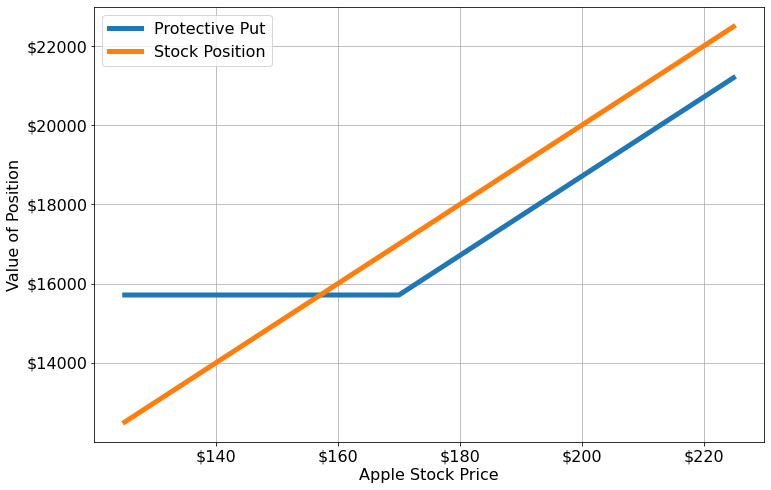

In [9]:
plt.plot(np.arange(125,225,.1),protect_put,label='Protective Put',lw=5)
plt.plot(stock_price,stock_price*100,label='Stock Position',lw=5)

pl_label = ['$'+str(price) for price in range(14000,24000,2000)]
plt.yticks(range(14000,24000,2000),pl_label)
plt.ylabel('Value of Position')
appl_label = ['$'+str(price) for price in range(140,240,20)]
plt.xticks(range(140,240,20),appl_label)
plt.xlabel('Apple Stock Price')
plt.grid()
plt.legend();

In [12]:
def protective_put(ticker,sk_price,ivol,t,quantity):
  st = yf.Ticker(ticker.upper())
  st_price = st.get_info()['previousClose']
  rf_rate = yf.Ticker('^TNX').get_info()['previousClose']*.01
  div_yield = aapl.get_info()['dividendYield']

  price_range = np.arange(st_price*.75,st_price*1.25,.1)
  p = black_scholes_merton(stock_price=st_price,strike_price=sk_price,rate=rf_rate, time=t, volatility=ivol, dividend=div_yield)[1]
  pro_put = [(price-p)*100 if (price-p)*100 > (sk_price-p)*100 else (sk_price-p)*100 for price in price_range]

  #plotting
  plt.plot(price_range,pro_put,label='Protective Put',lw=5)
  plt.plot(price_range,price_range*100,label='Stock Position',lw=5)
  plt.ylabel('Value of Position')
  plt.xlabel('Stock Price')
  plt.grid()
  plt.legend();

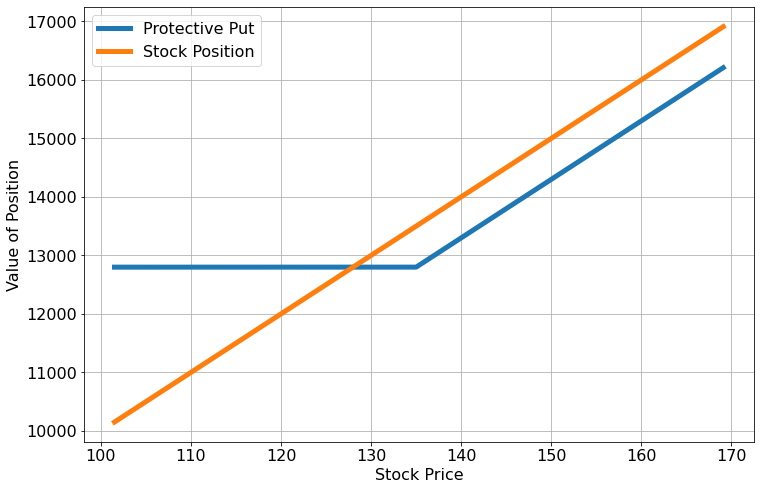

In [14]:
protective_put('IBM',135,.2,.5,1)

# **References and Additional Learning**

## **Textbook**

- **[Options, Futures, and Other Derivatives, 10th Edition](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html)**

## **Videos**

- **[Black Scholes Merton option pricing model](https://www.youtube.com/watch?v=sbdba4AB5JM&ab_channel=BionicTurtle) from Bionic Turle**

- **[Simple option trading strategies: an option plus the underlying asset](https://www.youtube.com/watch?v=Ee8gJLGkcY8&t=105s&ab_channel=BionicTurtle) from Bionic Turtle**

## **Websites**

- **[Input parameter for Stock Price and Dividend Yield](https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch) from Yahoo! Finance**

- **[Input parameter for Implied Volatility and Time](https://finance.yahoo.com/quote/AAPL/options?date=1645142400) from Yahoo! Finance**

- **[Black-Scholes Model](https://www.investopedia.com/terms/b/blackscholes.asp) by Adam Hayes from Investopedia.com**

- **[European Option](https://www.investopedia.com/terms/e/europeanoption.asp) from Investopedia.com**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717). Happy coding!**